# Spaceship Titanic

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## Data Exploration

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `ransported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

In [2]:
df = pd.read_csv('train.csv')

In [8]:
print('Shape of the data', df.shape)

Shape of the data (8693, 14)


In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Departure/Destinations

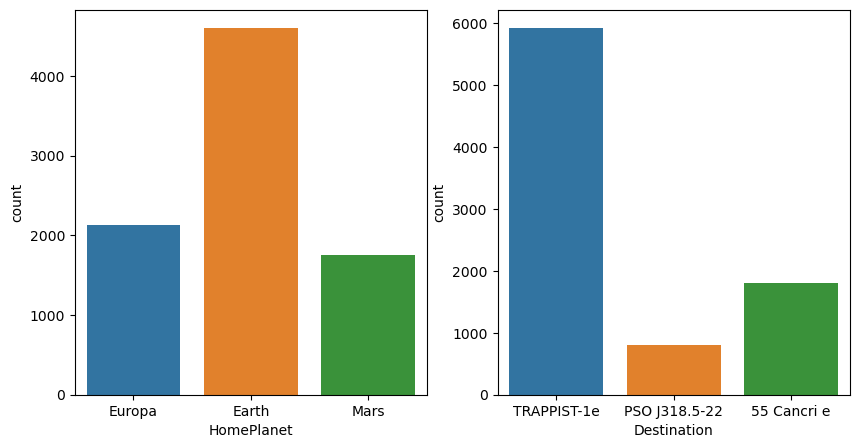

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df.HomePlanet, ax=ax[0])
sns.countplot(x=df.Destination, ax=ax[1])
plt.show()

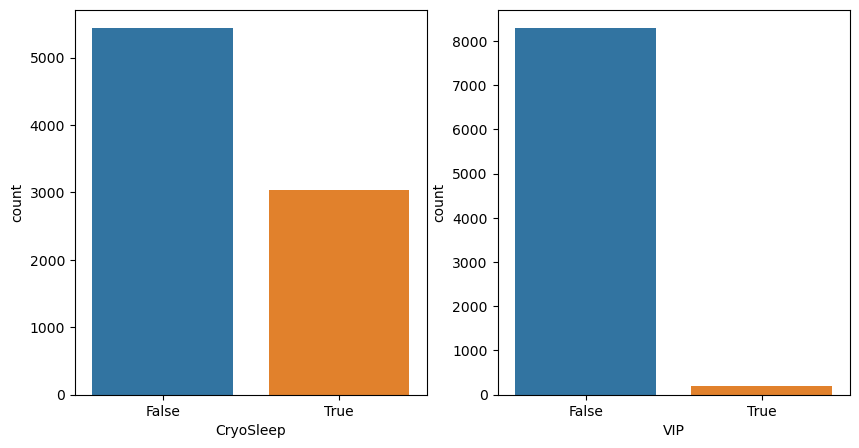

In [35]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df.CryoSleep, ax=ax[0])
sns.countplot(x=df.VIP, ax=ax[1])
plt.show()

### Explore the distributions of the numerical values

**Thoughts**

- `Numerical values are not distributed uniformly`: All of the variables (except for age) will need to be log adjusted
- `A lot of empty values`: will replace them with the mean or median of the columns
- `Check correlation between the variables`: {conclusion and mode of action}

In [69]:
num_vars = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df[num_vars].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


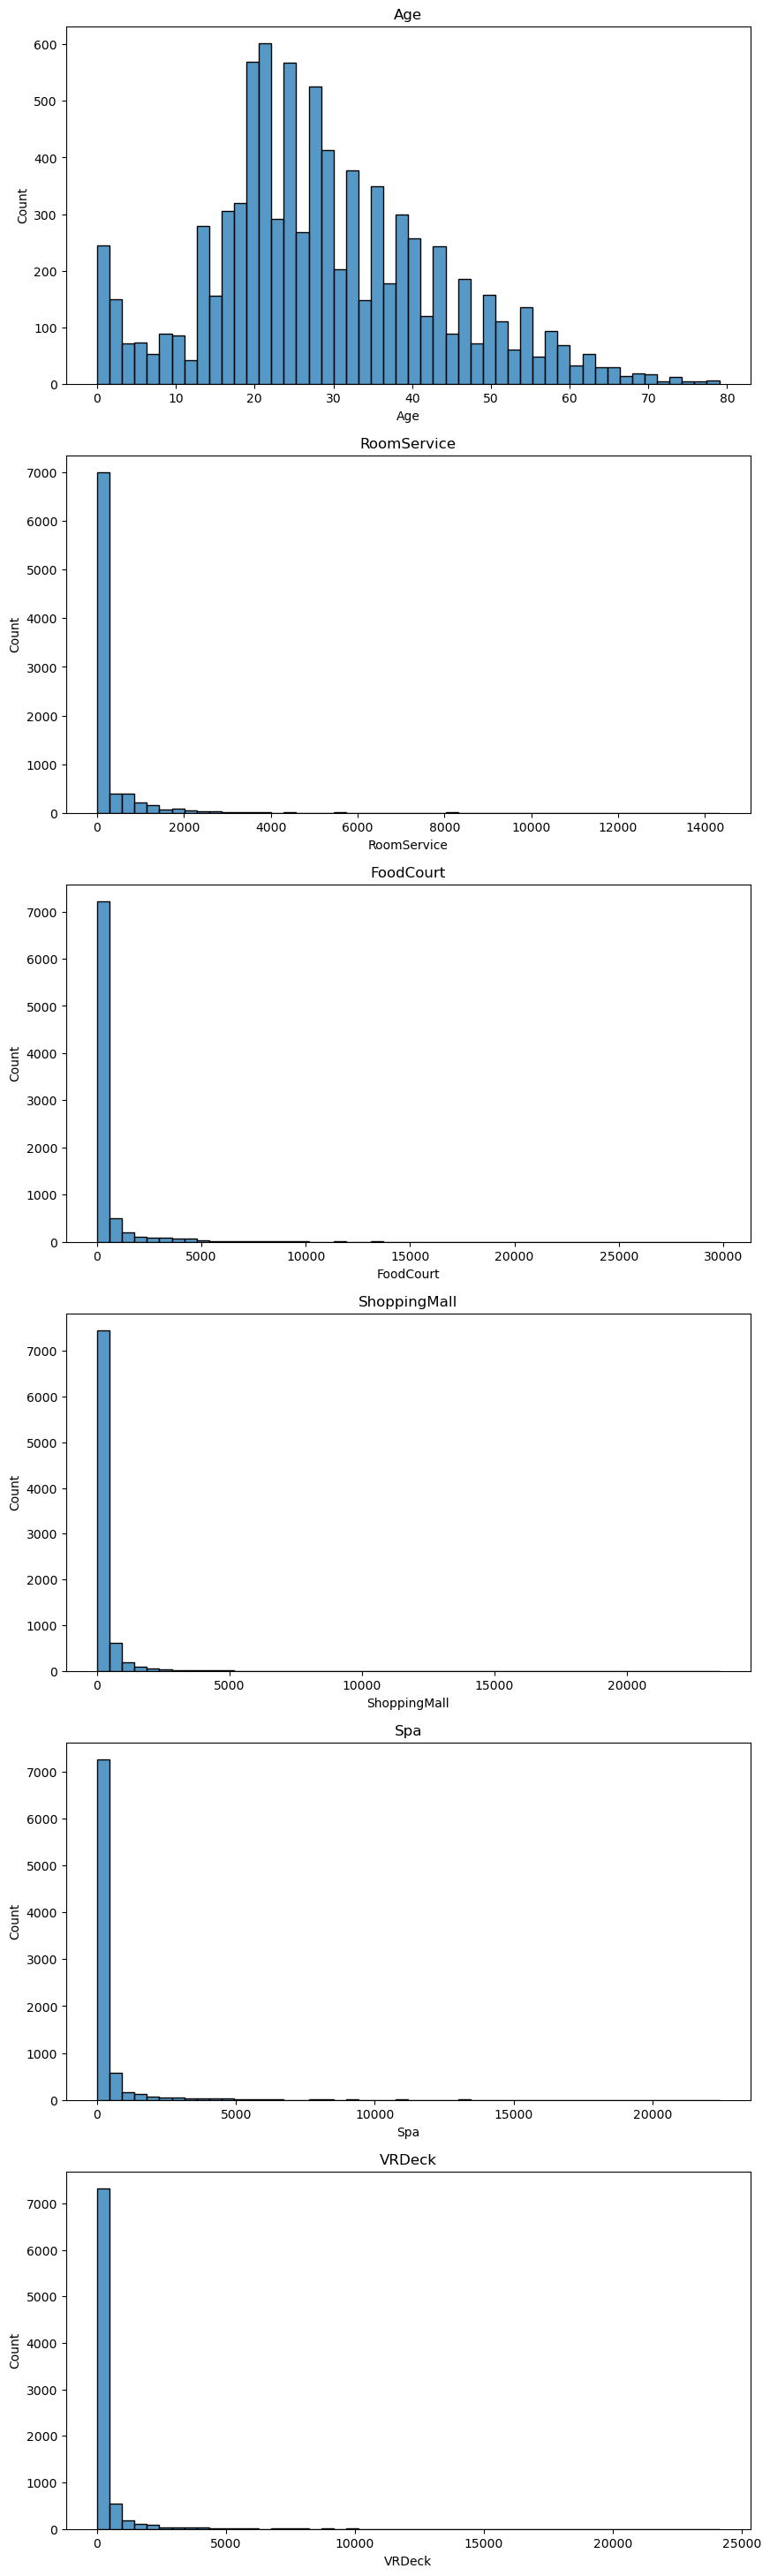

In [25]:
fig, ax = plt.subplots(6, 1,  figsize=(10, 15))
plt.subplots_adjust(top = 2)

for i,col in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.histplot(df[col], bins=50, ax=ax[i]);
    ax[i].set_title(col)

### Check for missing values

In [65]:
print('Number of "NaN" values')
print(df[num_vars].isnull().sum(),'\n') # Check for missing values
print('Number of infinite values')
print(np.isinf(df[num_vars]).sum(), '\n') # Check for infinite values

Number of "NaN" values
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64 

Number of infinite values
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64 



In [72]:
df.isnull().iloc[:10]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,PartySize
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
df[df.isnull().any(axis=1)][num_vars]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7,28.0,0.0,0.0,0.0,0.0,NaN
10,34.0,0.0,0.0,NaN,0.0,0.0
15,31.0,32.0,0.0,876.0,0.0,0.0
16,27.0,1286.0,122.0,NaN,0.0,0.0
23,29.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...
8667,29.0,0.0,2972.0,NaN,28.0,188.0
8674,13.0,39.0,0.0,1085.0,24.0,0.0
8675,44.0,1030.0,1015.0,0.0,11.0,NaN
8684,23.0,0.0,0.0,0.0,0.0,0.0


## Checking for correlations between the variables

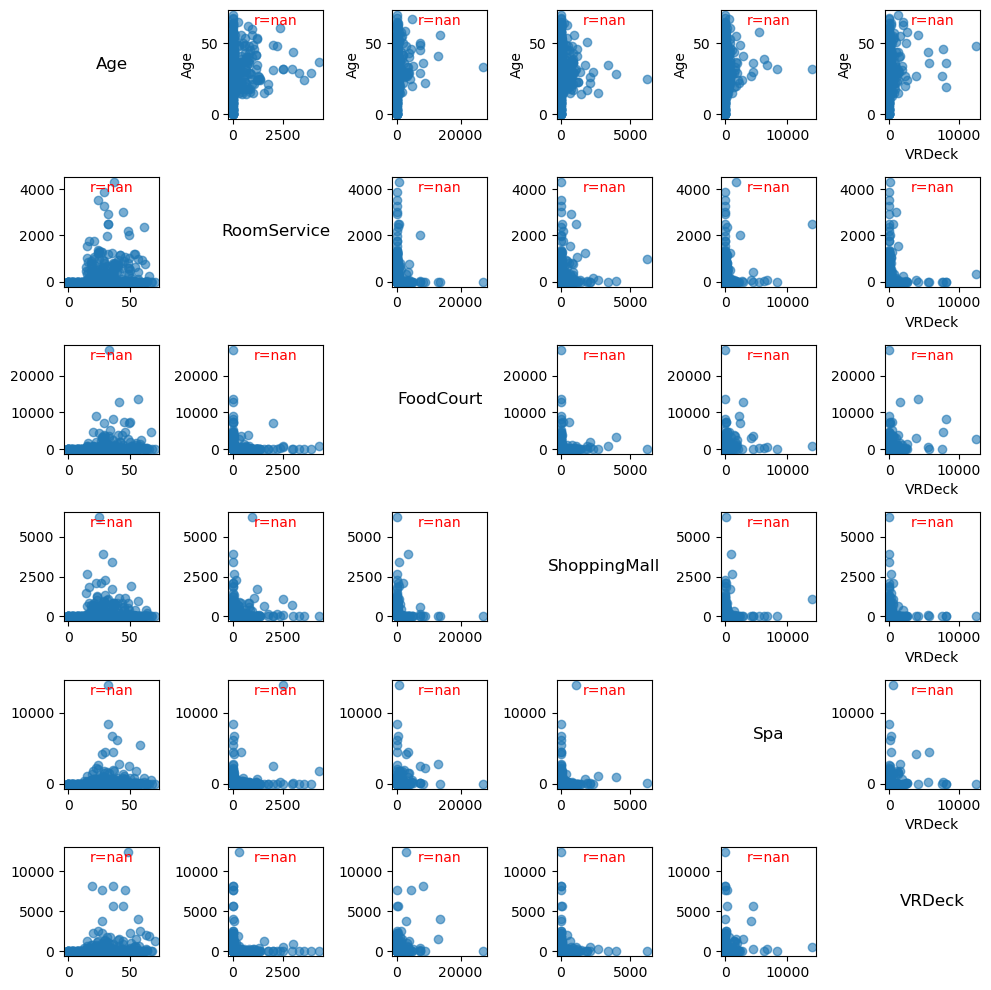

In [62]:
num_cols = len(num_vars)
idx = np.random.choice(len(df), 500)
# Create subplots grid
fig, axes = plt.subplots(num_cols, num_cols, figsize=(10, 10), sharex=False, sharey=False)

# Plot scatterplots
for i, col1 in enumerate(num_vars):
    for j, col2 in enumerate(num_vars):
        ax = axes[i, j]
        if i != j:  # Off-diagonal: scatterplots
            ax.scatter(df[col2].iloc[idx], df[col1].iloc[idx], alpha=0.6)
        
            corr = np.corrcoef(df[col2], df[col1])[0, 1]
            ax.text(0.5, 0.9, f'r={corr:.2f}', transform=ax.transAxes, fontsize=10, 
                    ha='center', va='center', color='red')

        else:  # Diagonal: variable name or histogram
            ax.text(0.5, 0.5, col1, fontsize=12, ha='center', va='center')
            ax.set_axis_off()  # Turn off axis for diagonal
        ax.set_xlabel(col2 if j == num_cols - 1 else '')
        ax.set_ylabel(col1 if i == 0 else '')

# Adjust layout
plt.tight_layout()
plt.show()


## Data Preprocessing

### Separating GroupID and Number of people in the group into two different numerical columns

In [46]:
df[['GroupID', 'PartySize']] = df['PassengerId'].str.split('_', expand=True).astype(int)

<Axes: xlabel='GroupID', ylabel='Count'>

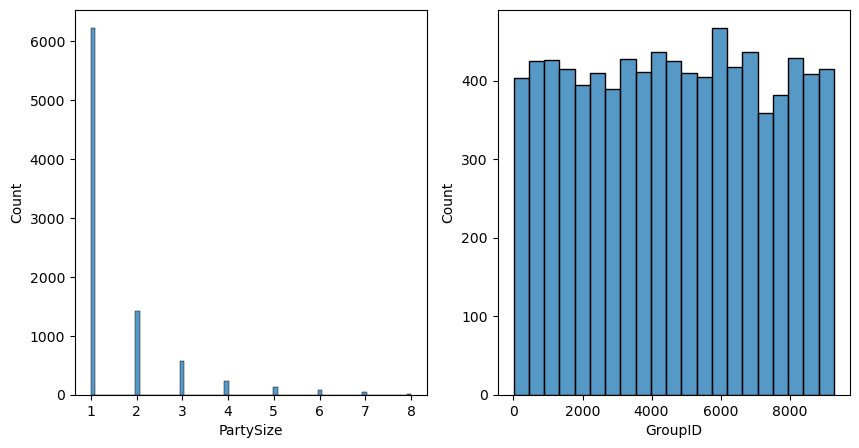

In [48]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df.PartySize, ax=ax[0])
sns.histplot(df.GroupID, ax=ax[1])

In [55]:
df[['PassengerId','GroupID', 'PartySize']]

,PassengerId,GroupID,PartySize
0,0001_01,1,1
1,0002_01,2,1
2,0003_01,3,1
3,0003_02,3,2
4,0004_01,4,1
...,...,...,...
8688,9276_01,9276,1
8689,9278_01,9278,1
8690,9279_01,9279,1
8691,9280_01,9280,1


In [53]:
len(df)

8693

In [56]:
max(df.PartySize)

8